# Week6 ML Zoomcamp

Trees

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = '../data/car_fuel_efficiency_hw_06.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [22]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [21]:
df.fillna(0,inplace=True)

In [23]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [26]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [27]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0


In [30]:
from sklearn.feature_extraction import DictVectorizer

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
train_dicts = df_train.to_dict(orient='records')

In [33]:

X_train = dv.fit_transform(train_dicts)

# Question 1

In [43]:
from sklearn.tree import DecisionTreeRegressor,export_text


In [37]:
regressor = DecisionTreeRegressor(max_depth=1)

In [38]:
model = regressor.fit(X_train, y_train)

In [41]:
model.score(X_train, y_train)

0.6066505378272743

In [48]:
print(export_text(regressor, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [49]:
from sklearn import tree

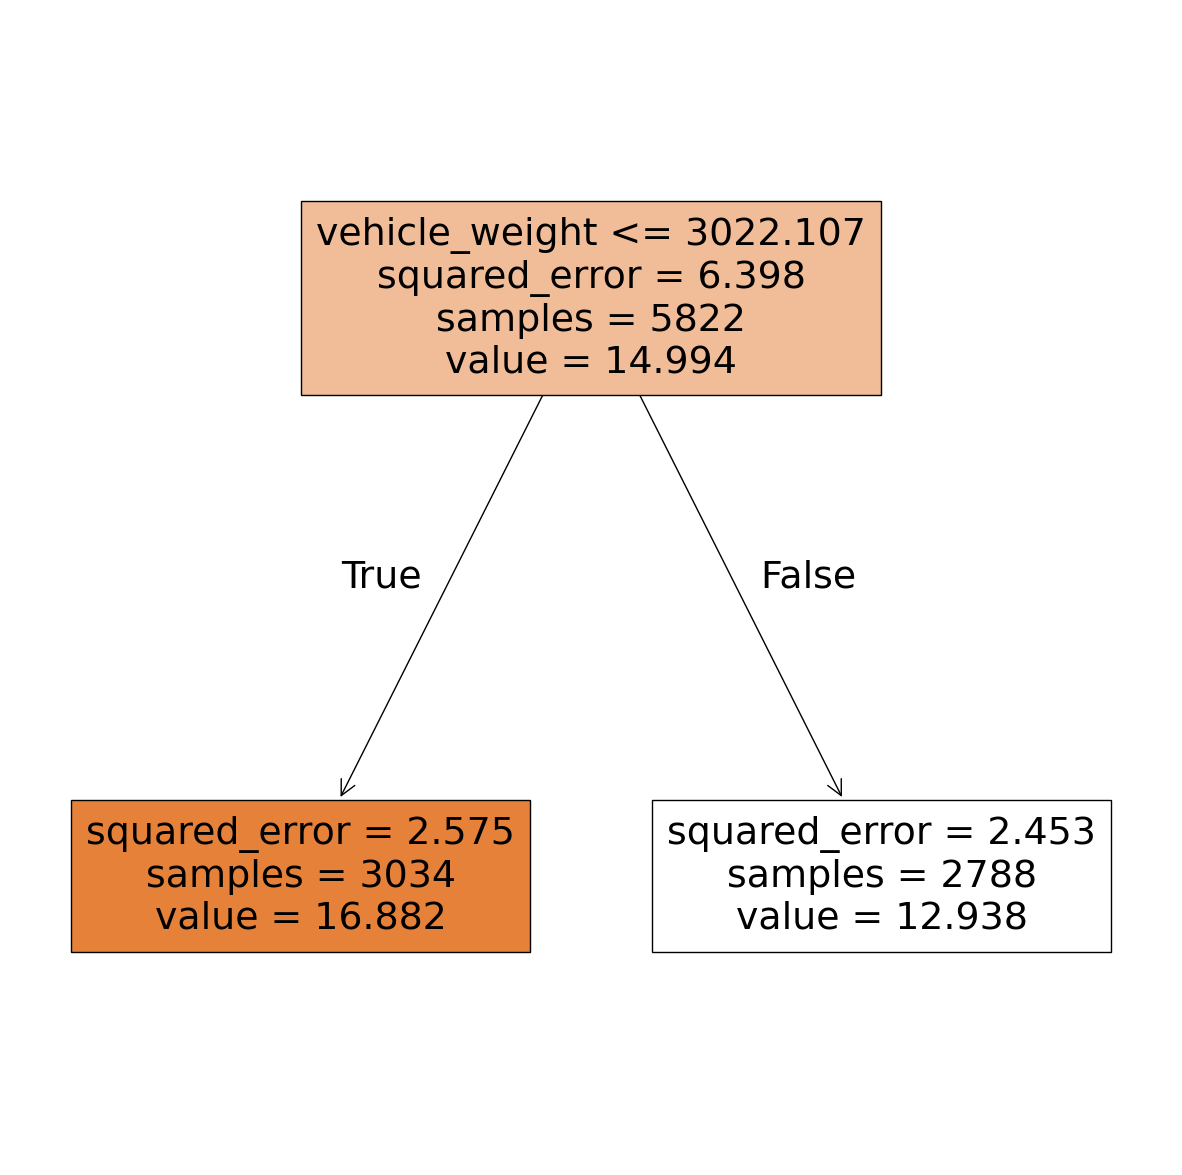

In [51]:
plt.figure(figsize = (15,15))
tree.plot_tree(regressor, feature_names=list(dv.get_feature_names_out()), 
                   filled = True);

# Question 2

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [66]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

In [67]:
rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)

In [68]:
model = rf.fit(X_train, y_train)


In [69]:
y_pred = model.predict(X_val)

In [73]:
root_mean_squared_error(y_val, y_pred)

0.4599777557336149

# Question 3

In [78]:
estimators = np.arange(10,210,10)

In [85]:
scores = []

for n in estimators:
    rf = RandomForestRegressor(n_estimators=n, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    scores.append((n, rmse))

In [86]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

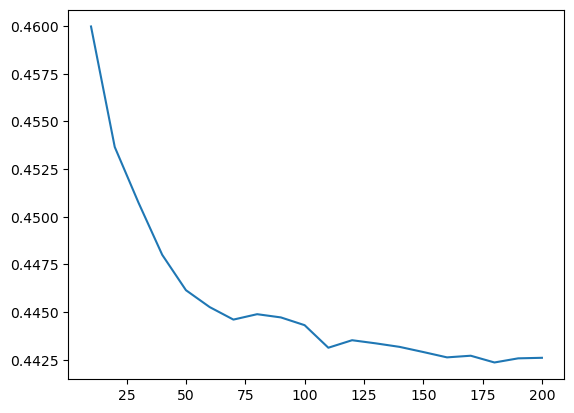

In [87]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [89]:
df_scores.round(3)

,n_estimators,rmse
0,10,0.460
1,20,0.454
2,30,0.451
3,40,0.448
4,50,0.446
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.444


In [91]:
# Question 4

In [92]:
max_depth = [10, 15, 20, 25]

In [98]:
scores = []

for n in estimators:
    for m in max_depth:
        rf = RandomForestRegressor(n_estimators=n, max_depth=m,random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
    
        scores.append((n,m, rmse))

In [99]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth','rmse'])

In [100]:
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                     
max_depth        10     15     20     25
n_estimators                            
10            0.452  0.457  0.459  0.460
20            0.449  0.452  0.453  0.454
30            0.446  0.450  0.451  0.451
40            0.444  0.448  0.448  0.448
50            0.443  0.446  0.446  0.446
60            0.442  0.445  0.445  0.446
70            0.442  0.444  0.444  0.445
80            0.442  0.444  0.445  0.445
90            0.442  0.444  0.445  0.445
100           0.442  0.444  0.445  0.444
110           0.441  0.443  0.444  0.443
120           0.441  0.443  0.444  0.444
130           0.441  0.443  0.444  0.443
140           0.441  0.443  0.443  0.443
150           0.440  0.443  0.443  0.443
160           0.440  0.442  0.443  0.443
170           0.440  0.443  0.443  0.443
180           0.440  0.442  0.443  0.442
190           0.440  0.442  0.443  0.443
200           0.440  0.442  0.443  0.443

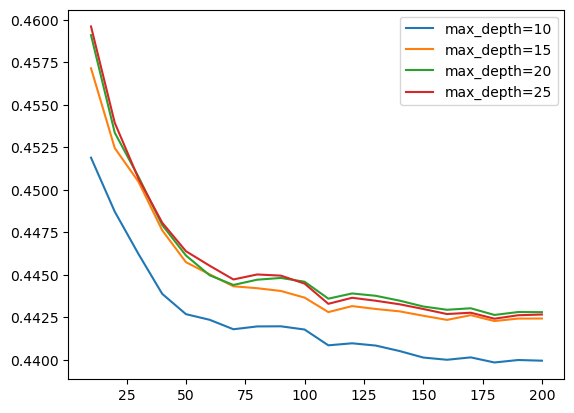

In [103]:
for d in max_depth:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [ ]:
# Question 5

In [101]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20,random_state=1,n_jobs=-1)

In [104]:
model = rf.fit(X_train, y_train)

In [106]:
model.feature_importances_

array([1.14707165e-02, 3.81809750e-04, 3.11842085e-04, 3.26932342e-03,
       3.43693411e-04, 3.36671988e-04, 1.60402148e-02, 3.18229841e-03,
       2.35867094e-03, 1.59113306e-03, 4.76103046e-04, 5.20358083e-04,
       5.55151959e-04, 9.59162013e-01])

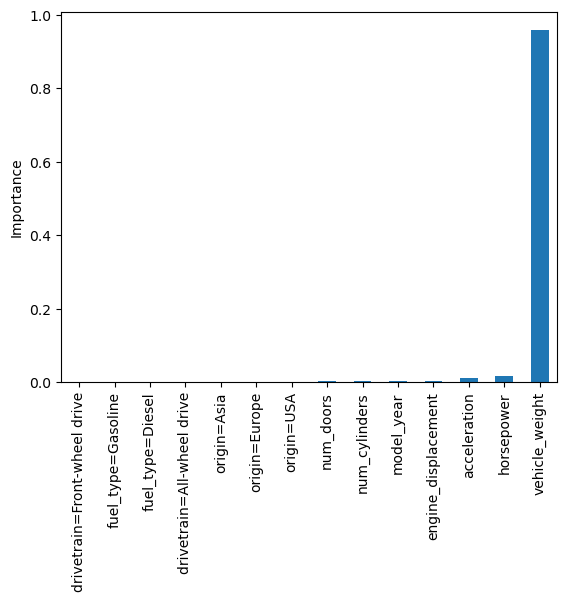

In [110]:
feature_importance = pd.Series(model.feature_importances_, index = dv.feature_names_)
feature_importance.sort_values().plot(kind = 'bar')
plt.ylabel('Importance');

In [111]:
# Question 6

In [112]:
import xgboost as xgb

In [113]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [114]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [115]:
y_pred = model.predict(dval)

In [118]:
root_mean_squared_error(y_val, y_pred)

0.45017755678087246

In [119]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [120]:
y_pred = model.predict(dval)

In [121]:
root_mean_squared_error(y_val, y_pred)

0.42622800553359225